In [3]:
import pandas as pd

In [4]:
prices = pd.read_csv("MSFTPrices.csv", parse_dates=['Date'])
prices = prices.sort_values(by='Date')
prices.set_index('Date', inplace=True)

In [5]:
prices.head()

,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [7]:
prices["Returns"] = prices["Adjusted"].pct_change()
prices.head()

,Open,High,Low,Close,Volume,Adjusted,Returns
Date,,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


In [9]:
import matplotlib.pyplot as plt

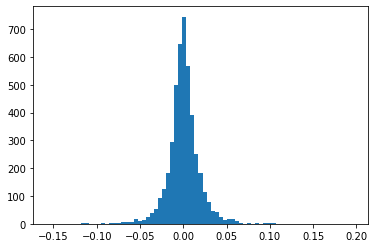

In [10]:
plt.hist(prices["Returns"].dropna(), bins=75, density=False)
plt.show()

In [11]:
import numpy as np

In [12]:
np.mean(prices["Returns"])

0.00037777546435757676

In [13]:
# average annuliazed return
((1 + np.mean(prices["Returns"]))**252) - 1

0.09985839482852632

In [15]:
# standard deviation
np.std(prices["Returns"])**2

0.00037407816501973704

In [16]:
# in one year
np.std(prices["Returns"]) * np.sqrt(252)

0.3070304505826315

In [17]:
# kurtosis
from scipy.stats import kurtosis

In [18]:
kurtosis(prices["Returns"].dropna())

10.314572618025519

In [19]:
# test normality
from scipy import stats 
p_val = stats.shapiro(prices["Returns"].dropna())[1]
p_val

0.0